In [1]:
import numpy as np
import keras
import utils

import matplotlib.pyplot as plt

print("Keras : {}".format(keras.__version__))
%matplotlib inline 

Using TensorFlow backend.


Keras : 2.0.6


## Importer les données

In [2]:
(x_train, y_train), (x_test, y_test) = utils.load_mnist(path="mnist/")

## Pré-traitement des images

- conversion en float (réel)
- obtenir des valeurs entre [0.0 , 1.0] 

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train = x_train/255.
x_test = x_test/255.

In [8]:
x_train = x_train.reshape([-1, 28*28])
x_test = x_test.reshape([-1, 28*28])

In [9]:
print(x_train.shape)
print(x_test.dtype)

(60000, 784)
float32


## "One-hot encoding" : préparation des labels

In [10]:
from keras.utils.np_utils import to_categorical
y_train_enc = to_categorical(y_train, num_classes=10)
y_test_enc = to_categorical(y_test, num_classes=10)

In [11]:
print("label : {}".format(y_train[0]))
print("label encodé : {}".format(y_train_enc[0]))

label : 5
label encodé : [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


## Construction du réseau de neurones 

In [12]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [13]:
model = Sequential()
model.add(Dense(10, input_shape=(784,), activation="softmax"))

## Apprentissage du réseau de neurones

In [14]:
from keras.optimizers import SGD

In [15]:
sgd = SGD(lr=0.001)

In [16]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train_enc,
              batch_size=32, epochs=10,
              verbose=2,
              validation_split=0.2,
              shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
2s - loss: 1.7967 - acc: 0.5039 - val_loss: 1.3587 - val_acc: 0.7418
Epoch 2/10
1s - loss: 1.1804 - acc: 0.7693 - val_loss: 0.9897 - val_acc: 0.8179
Epoch 3/10
1s - loss: 0.9325 - acc: 0.8113 - val_loss: 0.8167 - val_acc: 0.8403
Epoch 4/10
1s - loss: 0.8032 - acc: 0.8299 - val_loss: 0.7173 - val_acc: 0.8520
Epoch 5/10
1s - loss: 0.7232 - acc: 0.8418 - val_loss: 0.6524 - val_acc: 0.8612
Epoch 6/10
1s - loss: 0.6682 - acc: 0.8499 - val_loss: 0.6065 - val_acc: 0.8662
Epoch 7/10
1s - loss: 0.6277 - acc: 0.8551 - val_loss: 0.5720 - val_acc: 0.8721
Epoch 8/10
1s - loss: 0.5966 - acc: 0.8581 - val_loss: 0.5450 - val_acc: 0.8745
Epoch 9/10
1s - loss: 0.5716 - acc: 0.8620 - val_loss: 0.5233 - val_acc: 0.8773
Epoch 10/10
1s - loss: 0.5511 - acc: 0.8648 - val_loss: 0.5054 - val_acc: 0.8803


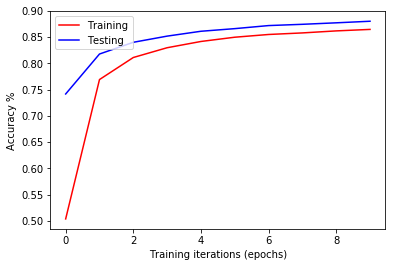

In [18]:
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'b')
plt.ylabel('Accuracy %')
plt.xlabel('Training iterations (epochs)')
plt.legend(['Training','Testing'], loc='upper left')
plt.show()

## Evaluer le modèle sur le données de test 

In [20]:
res = model.evaluate(x_test, y_test_enc)
print("\n[loss, accuracy] : {}".format(res))

 9088/10000 [==========================>...] - ETA: 0s
[loss, accuracy] : [0.51129259848594666, 0.87909999999999999]


### Faire des prédictions

In [25]:
pred = model.predict_classes(x_test, batch_size=32)

 9600/10000 [===========================>..] - ETA: 0s

In [26]:
print(pred.shape)
print(pred[0])

(10000,)


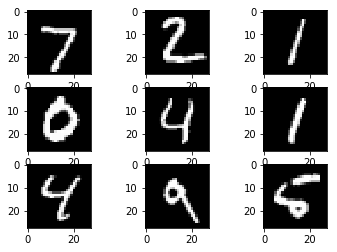

[7 2 1 0 4 1 4 9 6]
[7 2 1 0 4 1 4 9 5]


In [29]:
for i in range(9):
    plt.subplot(331+i)
    #Les images sont sous forme de vecteurs, de taille 784=28x28
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.show()
print(pred[:9])
print(y_test[:9])

### Obtenir les probabilités d'appatenance à chacune des classes

In [30]:
probs = model.predict(x_test)
print(probs.shape)
print(probs[0])
print(y_test_enc[0])

(10000, 10)
[  1.91126287e-03   1.97524627e-04   2.67477985e-03   6.36499748e-03
   2.98545416e-03   1.52736192e-03   4.45204409e-04   9.58353043e-01
   2.63170339e-03   2.29086541e-02]
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


## Sauvegarder et charger des modèles 

#### Uniquement l'architecture du modèle (pas ses paramètres internes) 

In [37]:
import json
from pprint import pprint

json_string = model.to_json()

with open('model_1.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [38]:
print(json_string)

{"class_name": "Sequential", "backend": "tensorflow", "config": [{"class_name": "Dense", "config": {"name": "dense_1", "units": 10, "batch_input_shape": [null, 784], "use_bias": true, "bias_initializer": {"class_name": "Zeros", "config": {}}, "trainable": true, "kernel_constraint": null, "dtype": "float32", "bias_constraint": null, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"distribution": "uniform", "mode": "fan_avg", "scale": 1.0, "seed": null}}, "activity_regularizer": null, "bias_regularizer": null, "kernel_regularizer": null, "activation": "softmax"}}], "keras_version": "2.0.6"}


In [45]:
from keras.models import model_from_json
model_json = model_from_json(json_string)

#### Sauvegarder un modèle et ses poids 

In [43]:
model.save("model_1.h5")

In [44]:
from keras.models import load_model
model_h5 = load_model("model_1.h5")